In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:/Users/HP/Documents/Praxis/MLops/datasets/diversified_ecommerce_dataset.csv")
df.shape

(1000000, 16)

In [3]:
df.describe()

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Return Rate,Popularity Index
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1005.120742,12.516955,10.002052,250.028536,24.985224,10.492896,49.970211
std,574.451223,8.539929,3.406026,144.676275,14.431730,5.484849,29.164875
min,10.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,507.860000,5.000000,8.000000,125.000000,12.490000,5.740000,25.000000
50%,1005.430000,15.000000,10.000000,250.000000,24.970000,10.480000,50.000000
75%,1502.310000,20.000000,12.000000,375.000000,37.470000,15.250000,75.000000
max,2000.000000,25.000000,15.000000,500.000000,50.000000,20.000000,100.000000


In [4]:
df.describe(include='object')

,Product ID,Product Name,Category,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Method,Seasonality
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,9000,43,5,900,5,15,3,3,2
top,P2639,Graphic Novels,Books,S912,18-24,"Dubai, UAE",Male,Standard,No
freq,150,25396,200751,1226,200345,67253,333791,333451,500203


In [5]:
df=df.drop(["Product ID","Supplier ID"],axis=1)
df

,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index
0,Jacket,Apparel,53.85,5,15,150,35-44,"New York, USA",Male,23.32,Standard,4.49,Yes,56
1,Camera,Electronics,761.26,10,15,224,25-34,"London, UK",Female,20.88,Overnight,16.11,No,79
2,Sneakers,Footwear,1756.76,5,8,468,25-34,"Tokyo, Japan",Non-Binary,16.43,Standard,4.93,No,40
3,Cookbooks,Books,295.24,10,15,25,18-24,"Paris, France",Female,27.49,Standard,1.31,No,93
4,Camera,Electronics,832.00,10,12,340,55+,"Tokyo, Japan",Male,45.93,Overnight,4.37,No,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Graphic Novels,Books,1802.12,5,10,340,55+,"Sydney, Australia",Non-Binary,6.21,Express,10.87,No,21
999996,Biographies,Books,1843.11,10,15,189,45-54,"Paris, France",Non-Binary,9.02,Overnight,19.19,No,59
999997,Formal Shoes,Footwear,1186.56,25,15,482,18-24,"Berlin, Germany",Male,42.85,Express,8.77,Yes,12
999998,Jeans,Apparel,803.06,25,10,145,55+,"Dubai, UAE",Non-Binary,22.54,Standard,11.27,Yes,44


In [6]:
from sklearn.model_selection import train_test_split

cols = ["Category", "Product Name", "Customer Age Group", "Customer Location",
        "Customer Gender", "Shipping Method", "Seasonality"]

strata = df[cols].astype(str).agg("|".join, axis=1)

df1, _ = train_test_split(
    df,
    test_size=0.9,
    stratify=strata,
    random_state=42
)


In [7]:
df1.describe()

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Return Rate,Popularity Index
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1009.173905,12.442150,9.997890,249.996640,25.008644,10.496513,50.020670
std,573.917923,8.538114,3.404118,144.599332,14.409918,5.471925,29.194072
min,10.020000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,512.512500,5.000000,8.000000,125.000000,12.540000,5.770000,25.000000
50%,1010.445000,10.000000,10.000000,250.000000,25.040000,10.480000,50.000000
75%,1506.980000,20.000000,12.000000,375.000000,37.460000,15.220000,75.000000
max,2000.000000,25.000000,15.000000,500.000000,50.000000,20.000000,100.000000


In [8]:
df1.describe(include='object')

,Product Name,Category,Customer Age Group,Customer Location,Customer Gender,Shipping Method,Seasonality
count,100000,100000,100000,100000,100000,100000,100000
unique,43,5,5,15,3,3,2
top,Graphic Novels,Books,35-44,"Cape Town, South Africa",Non-Binary,Standard,No
freq,2553,20108,20045,6746,33399,33364,50084


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 403086 to 757631
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Product Name        100000 non-null  object 
 1   Category            100000 non-null  object 
 2   Price               100000 non-null  float64
 3   Discount            100000 non-null  int64  
 4   Tax Rate            100000 non-null  int64  
 5   Stock Level         100000 non-null  int64  
 6   Customer Age Group  100000 non-null  object 
 7   Customer Location   100000 non-null  object 
 8   Customer Gender     100000 non-null  object 
 9   Shipping Cost       100000 non-null  float64
 10  Shipping Method     100000 non-null  object 
 11  Return Rate         100000 non-null  float64
 12  Seasonality         100000 non-null  object 
 13  Popularity Index    100000 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 11.4+ MB


In [10]:
df1.duplicated().sum()

np.int64(0)

In [11]:
df1.isnull().sum()

Product Name          0
Category              0
Price                 0
Discount              0
Tax Rate              0
Stock Level           0
Customer Age Group    0
Customer Location     0
Customer Gender       0
Shipping Cost         0
Shipping Method       0
Return Rate           0
Seasonality           0
Popularity Index      0
dtype: int64

In [12]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [13]:
num_cols

['Price',
 'Discount',
 'Tax Rate',
 'Stock Level',
 'Shipping Cost',
 'Return Rate',
 'Popularity Index']

In [14]:
cat_cols

['Product Name',
 'Category',
 'Customer Age Group',
 'Customer Location',
 'Customer Gender',
 'Shipping Method',
 'Seasonality']

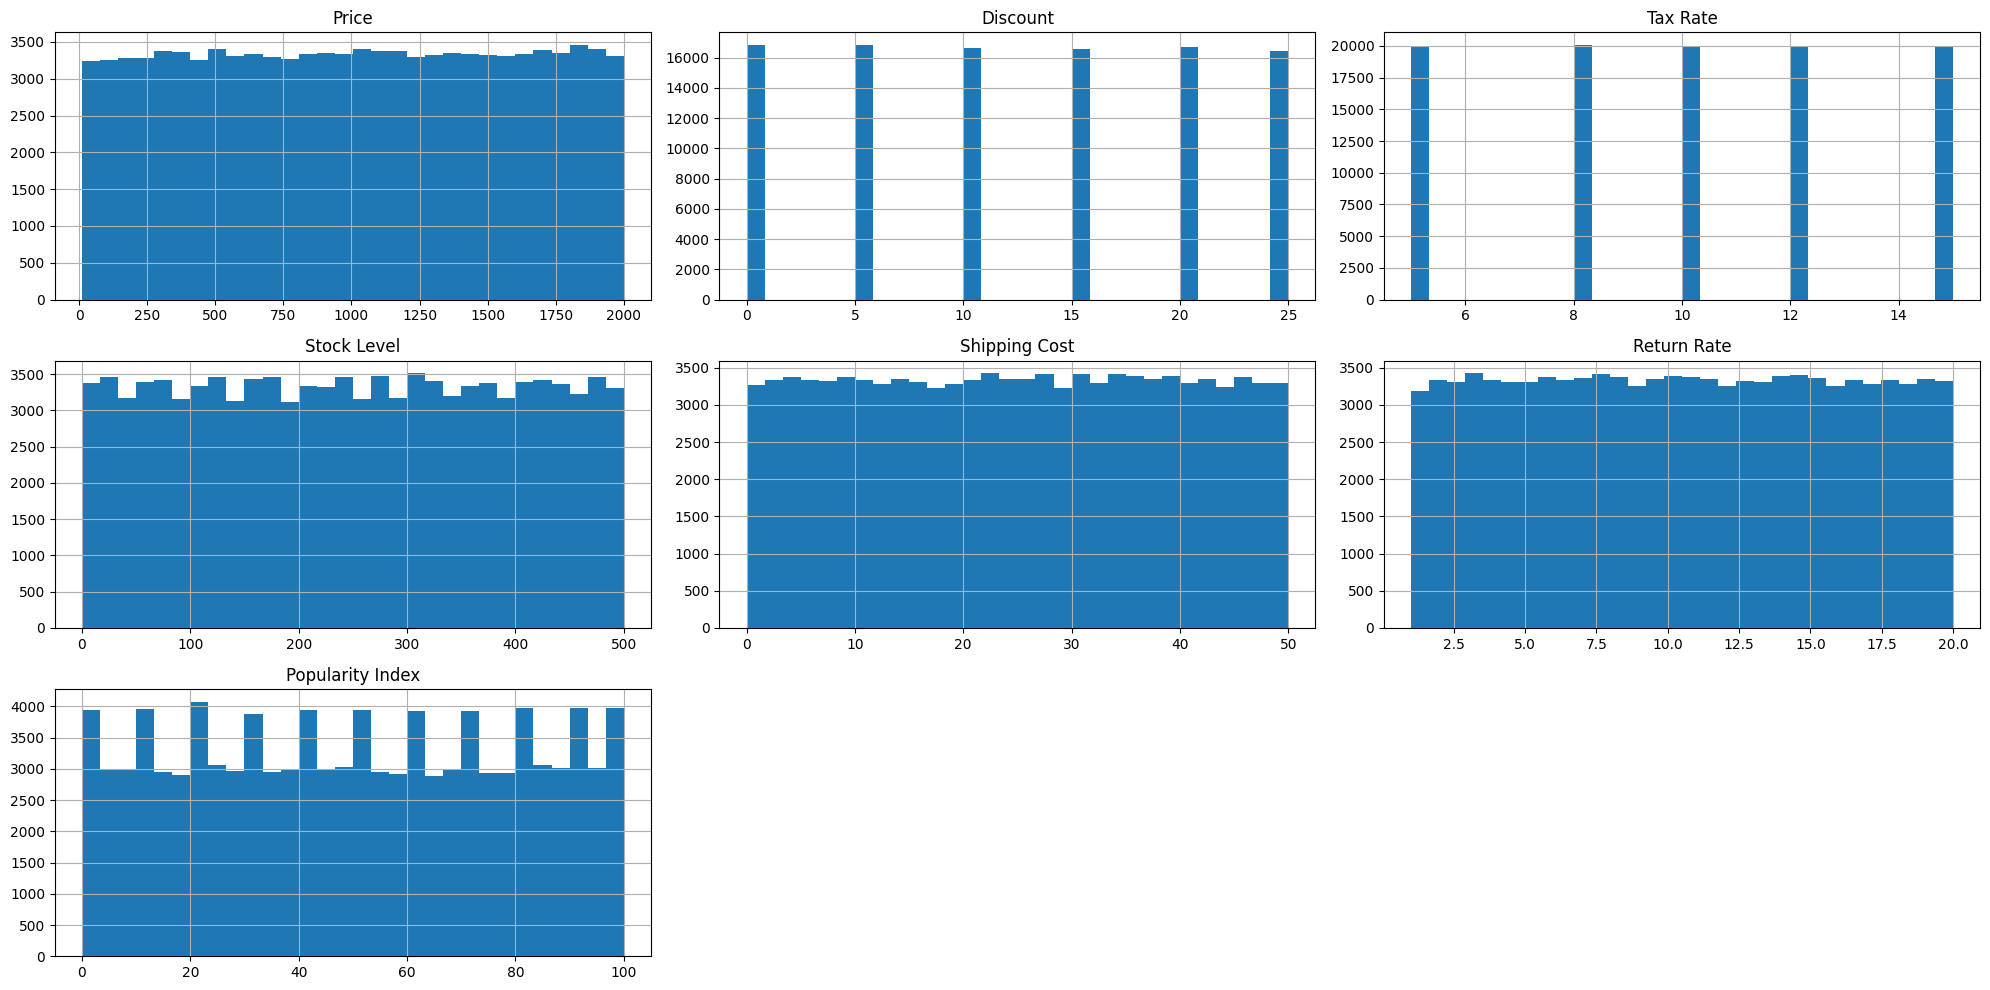

In [15]:
import matplotlib.pyplot as plt

df1[num_cols].hist(figsize=(20, 10), bins=30)
plt.tight_layout()
plt.show()


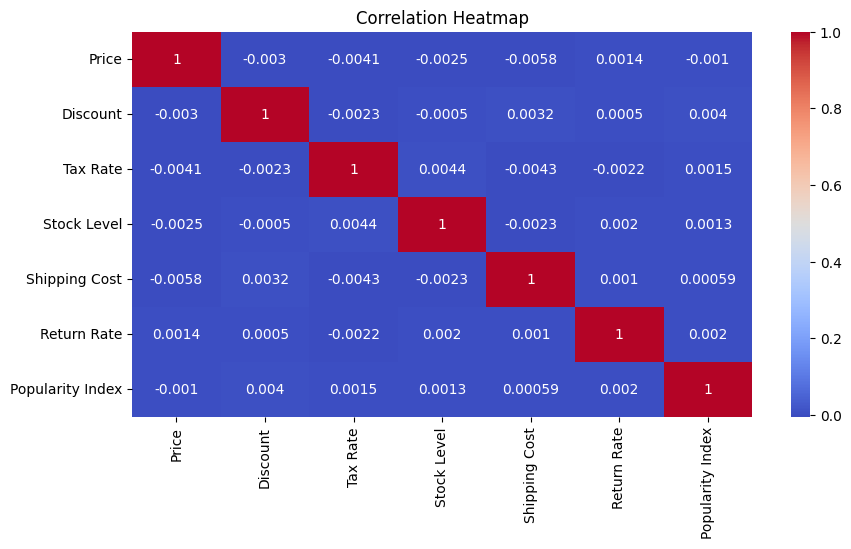

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
corr = df1[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


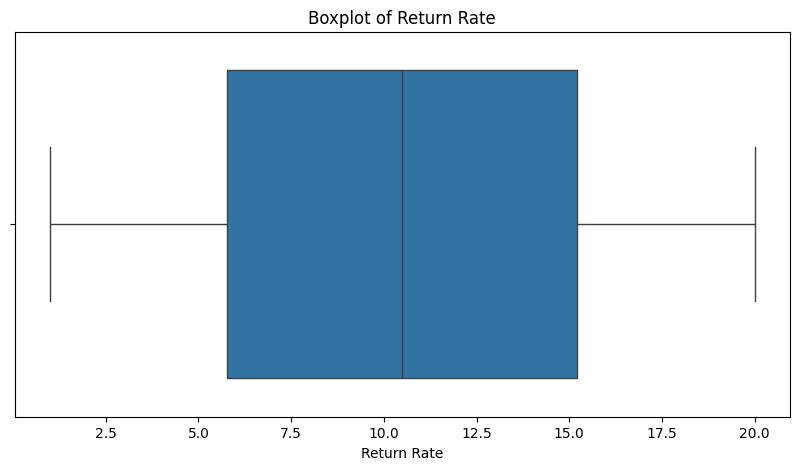

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['Return Rate'])
plt.title(f"Boxplot of Return Rate")
plt.show()


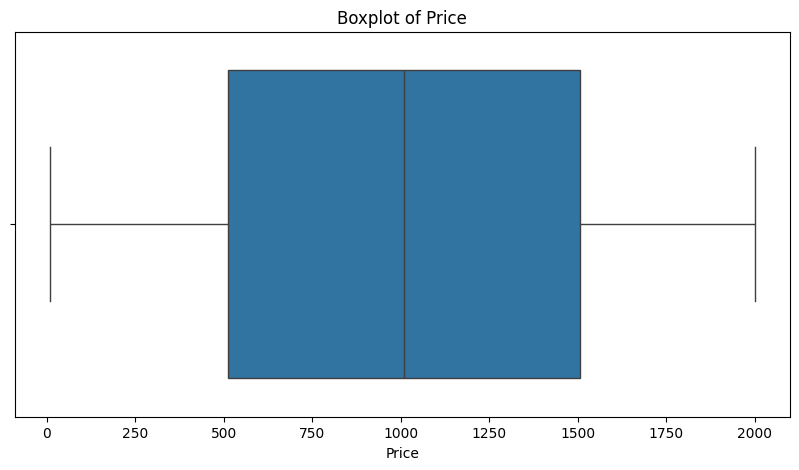

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['Price'])
plt.title(f"Boxplot of Price")
plt.show()

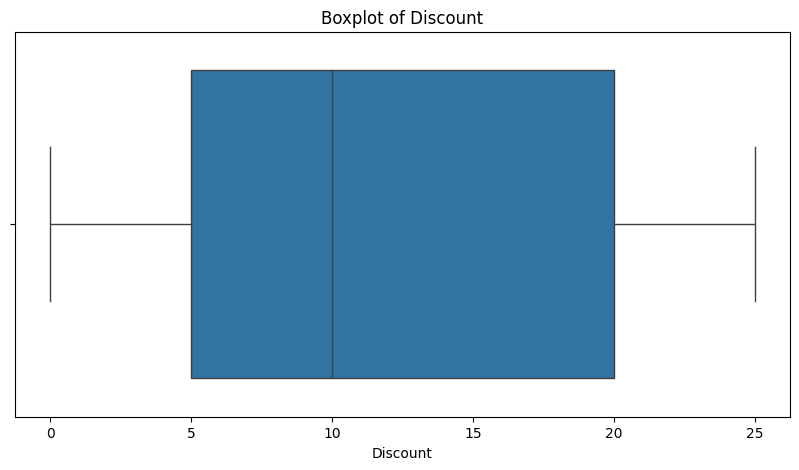

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['Discount'])
plt.title(f"Boxplot of Discount")
plt.show()

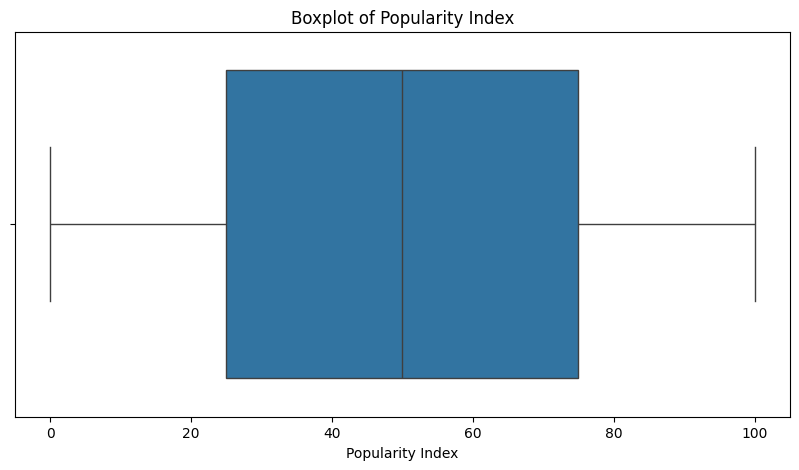

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['Popularity Index'])
plt.title(f"Boxplot of Popularity Index")
plt.show()

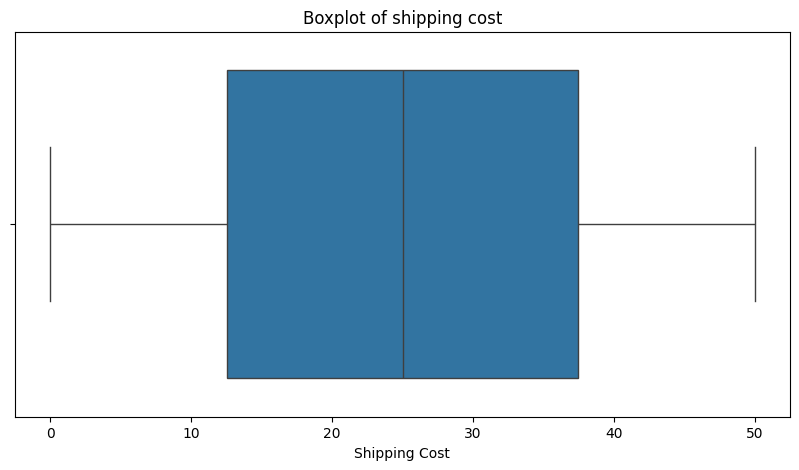

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['Shipping Cost'])
plt.title(f"Boxplot of shipping cost")
plt.show()

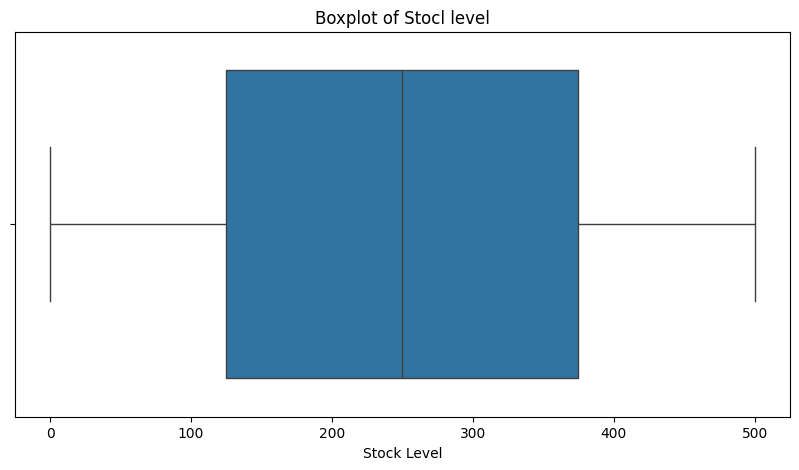

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['Stock Level'])
plt.title(f"Boxplot of Stocl level")
plt.show()

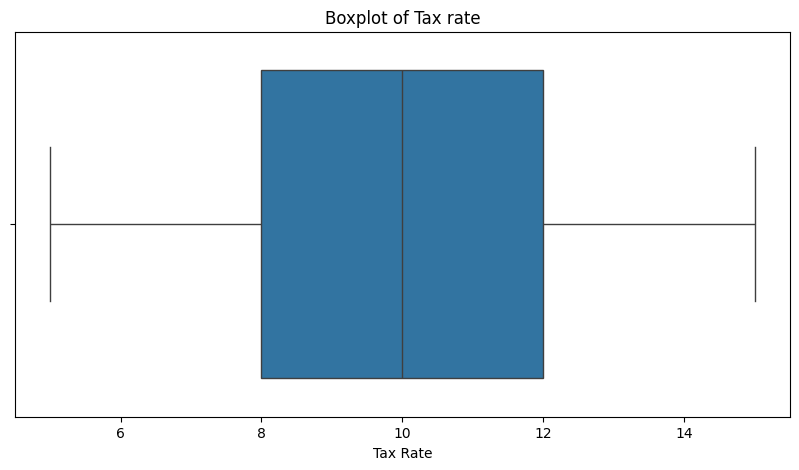

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['Tax Rate'])
plt.title(f"Boxplot of Tax rate")
plt.show()

In [24]:
for col in cat_cols:

    print(f"\n===== {col} (Percentage) =====")
    print((df1[col].value_counts(normalize=True) * 100).round(2))



===== Product Name (Percentage) =====
Product Name
Graphic Novels     2.55
Non-Fiction        2.54
Textbooks          2.52
Vacuum Cleaner     2.51
Refrigerator       2.51
Comics             2.51
Cookbooks          2.50
Biographies        2.50
Dishwasher         2.49
Fiction            2.49
Washing Machine    2.49
Toaster            2.49
Microwave          2.49
Magazines          2.49
Air Conditioner    2.49
Blender            2.47
Running Shoes      2.25
Boots              2.25
Speaker            2.25
Socks              2.24
Sweater            2.24
Monitor            2.24
Tablet             2.24
Sneakers           2.24
T-shirt            2.24
Smartphone         2.23
Slippers           2.23
Headphones         2.23
Heels              2.22
Gaming Console     2.22
Sandals            2.22
Flats              2.22
Laptop             2.22
Jacket             2.21
Skirt              2.21
Shirt              2.21
Formal Shoes       2.21
Hiking Shoes       2.21
Shorts             2.20
Camera      

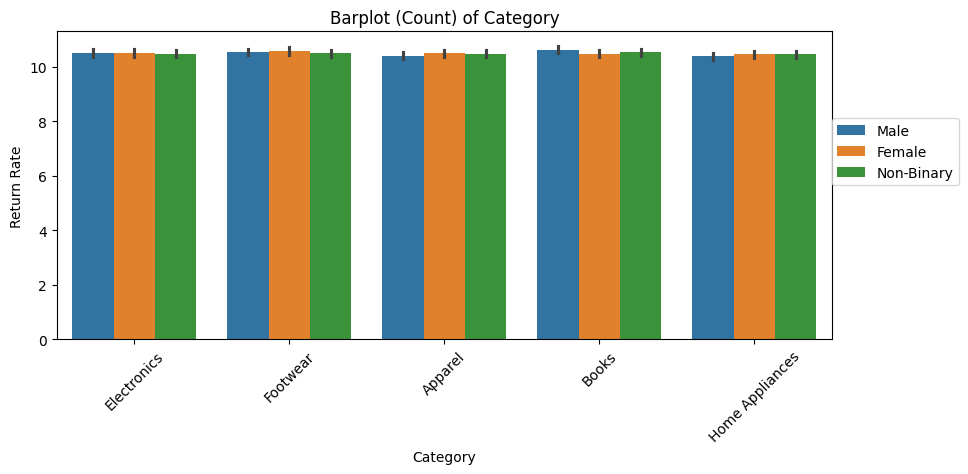

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(x=df1['Category'],y=df1['Return Rate'],hue=df1['Customer Gender'])
plt.xticks(rotation=45)
plt.legend(loc=[1,0.5])
plt.title(f"Barplot (Count) of Category")
plt.show()

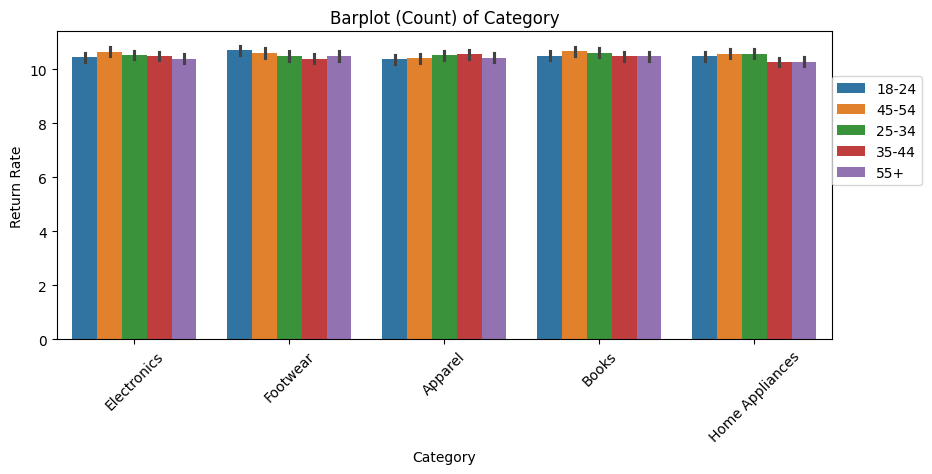

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x=df1['Category'],y=df1['Return Rate'],hue=df1['Customer Age Group'])
plt.xticks(rotation=45)
plt.legend(loc=[1,0.5])
plt.title(f"Barplot (Count) of Category")
plt.show()

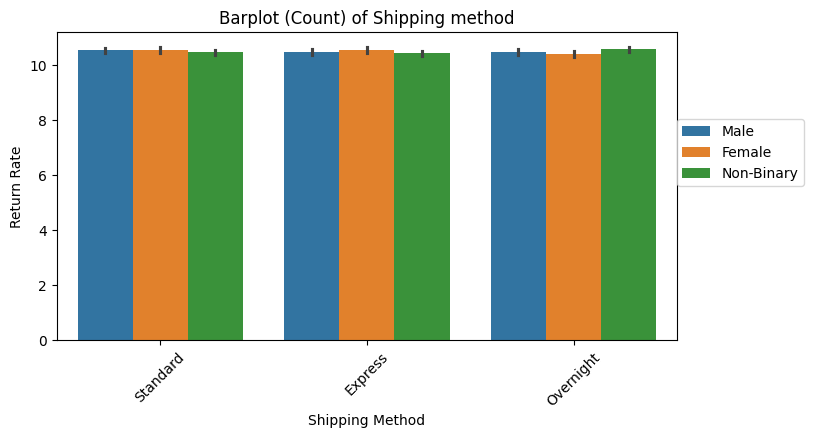

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(x=df1['Shipping Method'],y=df1['Return Rate'],hue=df1['Customer Gender'])
plt.xticks(rotation=45)
plt.legend(loc=[1,0.5])
plt.title(f"Barplot (Count) of Shipping method")
plt.show()

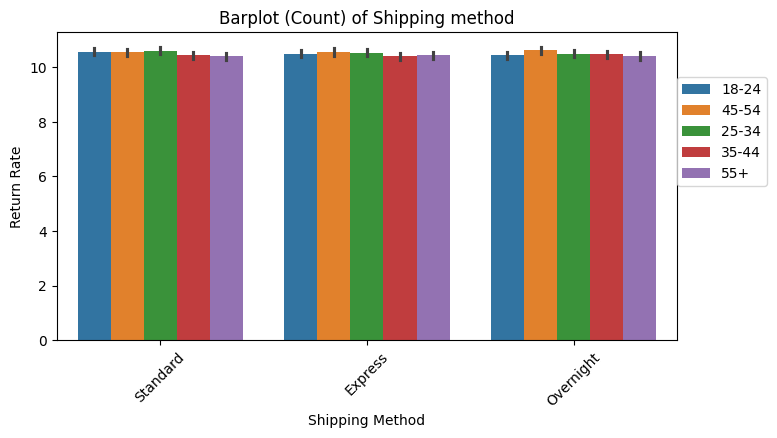

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(x=df1['Shipping Method'],y=df1['Return Rate'],hue=df1['Customer Age Group'])
plt.xticks(rotation=45)
plt.legend(loc=[1,0.5])
plt.title(f"Barplot (Count) of Shipping method")
plt.show()

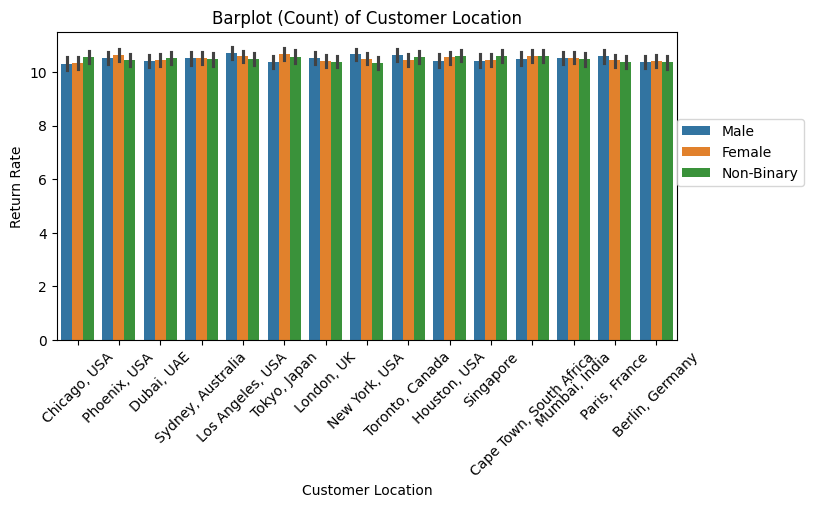

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(x=df1['Customer Location'],y=df1['Return Rate'],hue=df1['Customer Gender'])
plt.xticks(rotation=45)
plt.legend(loc=[1,0.5])
plt.title(f"Barplot (Count) of Customer Location")
plt.show()

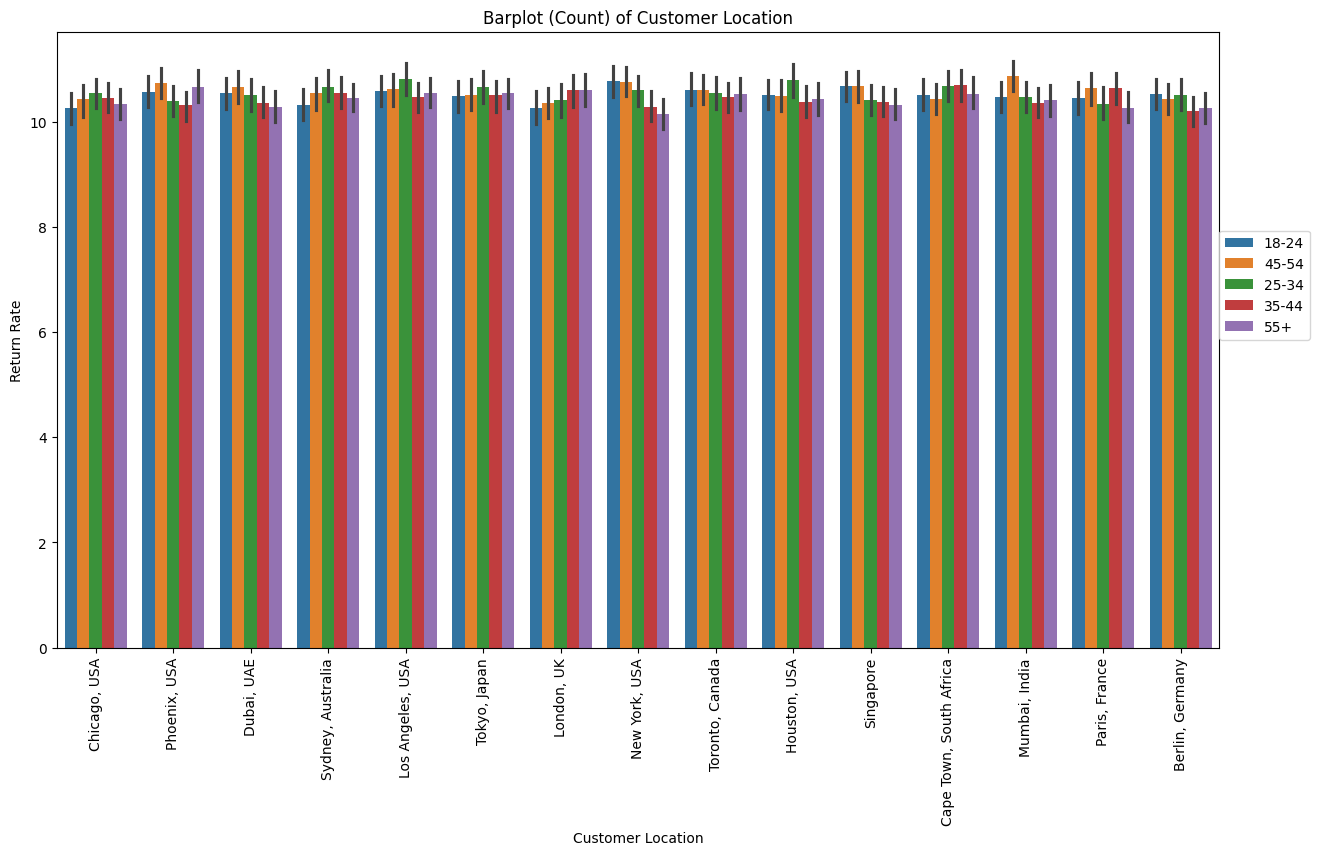

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x=df1['Customer Location'],y=df1['Return Rate'],hue=df1['Customer Age Group'])
plt.xticks(rotation=90)
plt.legend(loc=[1,0.5])
plt.title(f"Barplot (Count) of Customer Location")
plt.show()

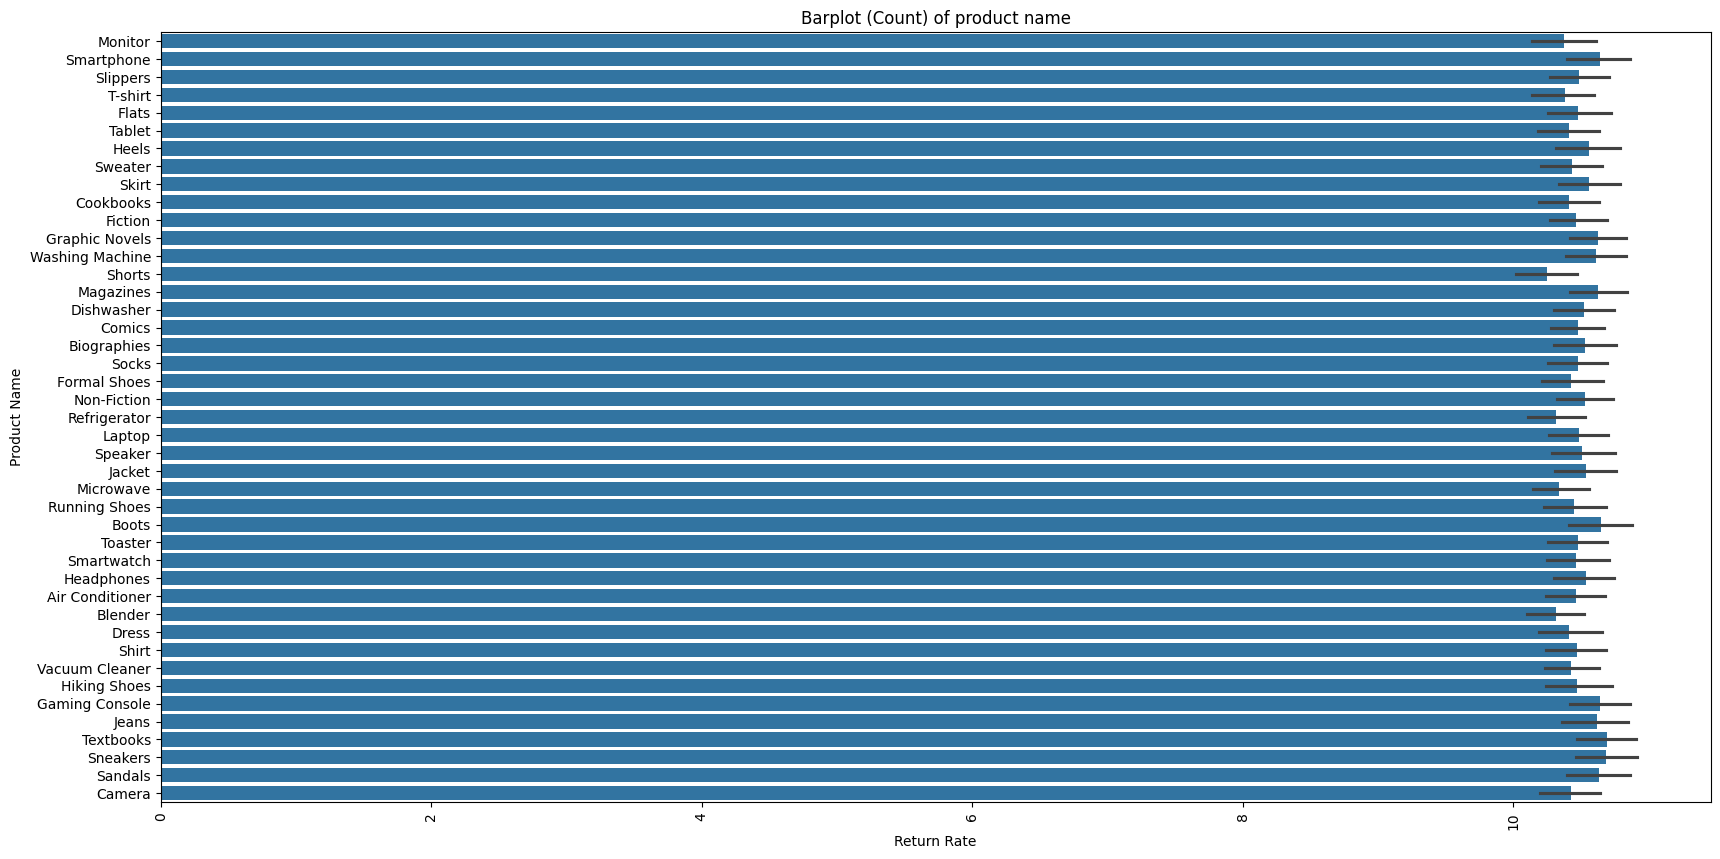

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(y=df1['Product Name'],x=df1['Return Rate'])
plt.xticks(rotation=90)
plt.title(f"Barplot (Count) of product name")
plt.show()

In [32]:
import pandas as pd
from scipy.stats import f_oneway

target = "Return Rate"
anova_results = []

for col in cat_cols:
    groups = []

    for level, g in df1.groupby(col):
        vals = g[target].dropna()

        if len(vals) >= 2:   # at least 2 values in group
            groups.append(vals)

    if len(groups) >= 2:     # at least 2 groups
        f_stat, p_val = f_oneway(*groups)
        anova_results.append({
            "feature": col,
            "F_stat": f_stat,
            "p_value": p_val
        })

anova_df = pd.DataFrame(anova_results).sort_values("p_value")
print(anova_df)



              feature    F_stat   p_value
2  Customer Age Group  3.165624  0.013052
1            Category  1.577443  0.177187
6         Seasonality  1.388121  0.238725
3   Customer Location  0.780924  0.691292
0        Product Name  0.858448  0.728502
5     Shipping Method  0.294876  0.744625
4     Customer Gender  0.042206  0.958672


In [33]:
import numpy as np
from scipy.stats import f_oneway

target = "Return Rate"
anova_results = []

for col in cat_cols:
    data = df1[[col, target]].dropna()
    groups = [g[target].values for _, g in data.groupby(col) if len(g) >= 2]

    if len(groups) >= 2:
        f_stat, p_val = f_oneway(*groups)

        overall_mean = data[target].mean()
        ss_between = sum(len(g) * (g.mean() - overall_mean) ** 2 for g in groups)
        ss_total = sum((data[target] - overall_mean) ** 2)

        eta_sq = ss_between / ss_total if ss_total != 0 else 0

        anova_results.append({
            "feature": col,
            "F_stat": f_stat,
            "p_value": p_val,
            "eta_squared": eta_sq
        })

anova_df = pd.DataFrame(anova_results).sort_values("eta_squared", ascending=False)
print(anova_df)


              feature    F_stat   p_value   eta_squared
0        Product Name  0.858448  0.728502  3.605731e-04
2  Customer Age Group  3.165624  0.013052  1.266153e-04
3   Customer Location  0.780924  0.691292  1.093338e-04
1            Category  1.577443  0.177187  6.309689e-05
6         Seasonality  1.388121  0.238725  1.388130e-05
5     Shipping Method  0.294876  0.744625  5.897653e-06
4     Customer Gender  0.042206  0.958672  8.441496e-07


In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model1 = ols(
    "Q('Return Rate') ~ C(Q('Shipping Method')) * C(Q('Customer Age Group'))",
    data=df1
).fit()

anova1 = sm.stats.anova_lm(model1, typ=2)
print("=== Two-Way ANOVA: Shipping Method x Age Group ===")
print(anova1)



=== Two-Way ANOVA: Shipping Method x Age Group ===
                                                          sum_sq       df  \
C(Q('Shipping Method'))                             1.772139e+01      2.0   
C(Q('Customer Age Group'))                          3.791701e+02      4.0   
C(Q('Shipping Method')):C(Q('Customer Age Group'))  1.299202e+02      8.0   
Residual                                            2.993640e+06  99985.0   

                                                           F    PR(>F)  
C(Q('Shipping Method'))                             0.295940  0.743833  
C(Q('Customer Age Group'))                          3.165989  0.013044  
C(Q('Shipping Method')):C(Q('Customer Age Group'))  0.542403  0.825291  
Residual                                                 NaN       NaN  


In [35]:
model2 = ols(
    "Q('Return Rate') ~ C(Q('Shipping Method')) * C(Q('Customer Gender'))",
    data=df1
).fit()

anova2 = sm.stats.anova_lm(model2, typ=2)
print("\n=== Two-Way ANOVA: Shipping Method x Gender ===")
print(anova2)



=== Two-Way ANOVA: Shipping Method x Gender ===
                                                       sum_sq       df  \
C(Q('Shipping Method'))                          1.763417e+01      2.0   
C(Q('Customer Gender'))                          2.503140e+00      2.0   
C(Q('Shipping Method')):C(Q('Customer Gender'))  2.723850e+02      4.0   
Residual                                         2.993874e+06  99991.0   

                                                        F    PR(>F)  
C(Q('Shipping Method'))                          0.294478  0.744921  
C(Q('Customer Gender'))                          0.041801  0.959061  
C(Q('Shipping Method')):C(Q('Customer Gender'))  2.274315  0.058722  
Residual                                              NaN       NaN  


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model_loc_age = ols(
    "Q('Return Rate') ~ C(Q('Customer Location')) * C(Q('Customer Age Group'))",
    data=df1
).fit()

print("=== Two-Way ANOVA: Location x Age Group ===")
print(sm.stats.anova_lm(model_loc_age, typ=2))


=== Two-Way ANOVA: Location x Age Group ===
                                                          sum_sq       df  \
C(Q('Customer Location'))                           3.263289e+02     14.0   
C(Q('Customer Age Group'))                          3.780727e+02      4.0   
C(Q('Customer Location')):C(Q('Customer Age Gro...  1.576276e+03     56.0   
Residual                                            2.991885e+06  99925.0   

                                                           F    PR(>F)  
C(Q('Customer Location'))                           0.778497  0.693950  
C(Q('Customer Age Group'))                          3.156782  0.013253  
C(Q('Customer Location')):C(Q('Customer Age Gro...  0.940099  0.602617  
Residual                                                 NaN       NaN  


In [37]:
model_loc_gender = ols(
    "Q('Return Rate') ~ C(Q('Customer Location')) * C(Q('Customer Gender'))",
    data=df1
).fit()

print("\n=== Two-Way ANOVA: Location x Gender ===")
print(sm.stats.anova_lm(model_loc_gender, typ=2))



=== Two-Way ANOVA: Location x Gender ===
                                                         sum_sq       df  \
C(Q('Customer Location'))                          3.273263e+02     14.0   
C(Q('Customer Gender'))                            2.490396e+00      2.0   
C(Q('Customer Location')):C(Q('Customer Gender'))  6.098176e+02     28.0   
Residual                                           2.993227e+06  99955.0   

                                                          F    PR(>F)  
C(Q('Customer Location'))                          0.780760  0.691471  
C(Q('Customer Gender'))                            0.041582  0.959271  
C(Q('Customer Location')):C(Q('Customer Gender'))  0.727289  0.850811  
Residual                                                NaN       NaN  


In [38]:
model_cat_age = ols(
    "Q('Return Rate') ~ C(Q('Category')) * C(Q('Customer Age Group'))",
    data=df1
).fit()

print("\n=== Two-Way ANOVA: Category x Age Group ===")
print(sm.stats.anova_lm(model_cat_age, typ=2))



=== Two-Way ANOVA: Category x Age Group ===
                                                   sum_sq       df         F  \
C(Q('Category'))                             1.891607e+02      4.0  1.579606   
C(Q('Customer Age Group'))                   3.793453e+02      4.0  3.167762   
C(Q('Category')):C(Q('Customer Age Group'))  5.509442e+02     16.0  1.150179   
Residual                                     2.993047e+06  99975.0       NaN   

                                               PR(>F)  
C(Q('Category'))                             0.176606  
C(Q('Customer Age Group'))                   0.013004  
C(Q('Category')):C(Q('Customer Age Group'))  0.300862  
Residual                                          NaN  


In [39]:
model_cat_gender = ols(
    "Q('Return Rate') ~ C(Q('Category')) * C(Q('Customer Gender'))",
    data=df1
).fit()

print("\n=== Two-Way ANOVA: Category x Gender ===")
print(sm.stats.anova_lm(model_cat_gender, typ=2))



=== Two-Way ANOVA: Category x Gender ===
                                                sum_sq       df         F  \
C(Q('Category'))                          1.889807e+02      4.0  1.577844   
C(Q('Customer Gender'))                   2.585617e+00      2.0  0.043176   
C(Q('Category')):C(Q('Customer Gender'))  1.374706e+02      8.0  0.573887   
Residual                                  2.993838e+06  99985.0       NaN   

                                            PR(>F)  
C(Q('Category'))                          0.177079  
C(Q('Customer Gender'))                   0.957743  
C(Q('Category')):C(Q('Customer Gender'))  0.800248  
Residual                                       NaN  


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

target = "Return Rate"

train_df, test_df = train_test_split(df1, test_size=0.2, random_state=42)

for d in [train_df, test_df]:
    d["Final Price"] = (d["Price"] * (1 - d["Discount"])) * (1 + d["Tax Rate"])
    d["Shipping_to_Price"] = d["Shipping Cost"] / (d["Price"] + 1e-6)

age_order = ["18-24", "25-34", "35-44", "45-54", "55+"]

train_df["Customer Age Group"] = pd.Categorical(train_df["Customer Age Group"], categories=age_order, ordered=True).codes
test_df["Customer Age Group"] = pd.Categorical(test_df["Customer Age Group"], categories=age_order, ordered=True).codes

prod_col = "Product Name"
prod_mean = train_df.groupby(prod_col)[target].mean()
global_mean = train_df[target].mean()

train_df[prod_col + "_TE"] = train_df[prod_col].map(prod_mean)
test_df[prod_col + "_TE"] = test_df[prod_col].map(prod_mean).fillna(global_mean)

train_df = train_df.drop(columns=[prod_col])
test_df = test_df.drop(columns=[prod_col])

onehot_cols = ["Category", "Customer Location", "Customer Gender", "Shipping Method", "Seasonality"]

train_df = pd.get_dummies(train_df, columns=onehot_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=onehot_cols, drop_first=True)

train_df, test_df = train_df.align(test_df, join="left", axis=1, fill_value=0)

X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("R2:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))

fi = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop 20 RF Feature Importances:")
print(fi)

Train shape: (80000, 34)
Test shape: (20000, 34)
R2: -0.015694645506398208
MAE: 4.7799706366666666

Top 20 RF Feature Importances:
Stock Level                                  0.118073
Final Price                                  0.116595
Shipping Cost                                0.106197
Price                                        0.105560
Popularity Index                             0.102721
Shipping_to_Price                            0.098318
Product Name_TE                              0.068721
Customer Age Group                           0.037330
Tax Rate                                     0.031014
Discount                                     0.022353
Seasonality_Yes                              0.013398
Shipping Method_Overnight                    0.011968
Customer Gender_Male                         0.011959
Shipping Method_Standard                     0.011858
Customer Gender_Non-Binary                   0.011830
Category_Footwear                            0.009014
Categ

In [41]:
df1["Return Rate"].describe()


count    100000.000000
mean         10.496513
std           5.471925
min           1.000000
25%           5.770000
50%          10.480000
75%          15.220000
max          20.000000
Name: Return Rate, dtype: float64

In [47]:
full_encoded = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
print("Full encoded shape:", full_encoded.shape)

full_encoded.to_csv("processed-data_for_experiments.csv", index=False)

Full encoded shape: (100000, 34)
